In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json 


In [29]:
TOKEN = '2RG2NEF3IPXMIPX3'

In [30]:
def cryptoRank(symbol): 
    function='CRYPTO_RATING'
    url = 'https://www.alphavantage.co/query'
    parametros = {'function':function, 'symbol':symbol, 'apikey': TOKEN}
    
    r = requests.get(url, params = parametros)
    return r.json()

data = cryptoRank ('BTC')
print(json.dumps(data, indent=3))

{
   "Crypto Rating (FCAS)": {
      "1. symbol": "BTC",
      "2. name": "Bitcoin",
      "3. fcas rating": "Superb",
      "4. fcas score": "905",
      "5. developer score": "860",
      "6. market maturity score": "882",
      "7. utility score": "965",
      "8. last refreshed": "2021-01-14 00:00:00",
      "9. timezone": "UTC"
   }
}


In [31]:
data = cryptoRank ('ETH')
print(json.dumps(data, indent=3))

{
   "Crypto Rating (FCAS)": {
      "1. symbol": "ETH",
      "2. name": "Ethereum",
      "3. fcas rating": "Superb",
      "4. fcas score": "974",
      "5. developer score": "969",
      "6. market maturity score": "901",
      "7. utility score": "996",
      "8. last refreshed": "2021-01-14 00:00:00",
      "9. timezone": "UTC"
   }
}


In [32]:
data = cryptoRank ('LINK')
print(json.dumps(data, indent=3))

{
   "Crypto Rating (FCAS)": {
      "1. symbol": "LINK",
      "2. name": "Chainlink",
      "3. fcas rating": "Superb",
      "4. fcas score": "933",
      "5. developer score": "923",
      "6. market maturity score": "858",
      "7. utility score": "960",
      "8. last refreshed": "2021-01-14 00:00:00",
      "9. timezone": "UTC"
   }
}


In [33]:
data = cryptoRank ('ADA')
print(json.dumps(data, indent=3))

{
   "Crypto Rating (FCAS)": {
      "1. symbol": "ADA",
      "2. name": "Cardano",
      "3. fcas rating": "Superb",
      "4. fcas score": "935",
      "5. developer score": "965",
      "6. market maturity score": "924",
      "7. utility score": "901",
      "8. last refreshed": "2021-01-14 00:00:00",
      "9. timezone": "UTC"
   }
}


In [34]:
data = cryptoRank ('XTZ')
print(json.dumps(data, indent=3))

{
   "Crypto Rating (FCAS)": {
      "1. symbol": "XTZ",
      "2. name": "Tezos",
      "3. fcas rating": "Attractive",
      "4. fcas score": "769",
      "5. developer score": "746",
      "6. market maturity score": "825",
      "7. utility score": "787",
      "8. last refreshed": "2021-01-14 00:00:00",
      "9. timezone": "UTC"
   }
}


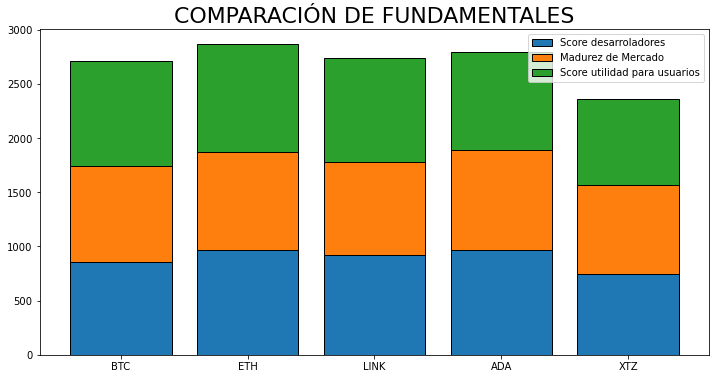

In [42]:
# Definimos las criptos
cryptos =['BTC', 'ETH','LINK','ADA','XTZ']

df = pd.DataFrame()
for i in range(len(cryptos)):
    data =cryptoRank(cryptos[i])['Crypto Rating (FCAS)']
    dataDF = pd.DataFrame(data, index=[i])
    df = pd.concat([df, dataDF])
    
df = df.drop(['3. fcas rating', '8. last refreshed', '9. timezone'], axis=1)
df.columns = ['Symbol', 'Name', 'FCAS Score', 'Developer', 'Mkt Maturity', 'Utility']

claves = ['FCAS Score', 'Developer', 'Mkt Maturity', 'Utility']

for clave in claves:
    df[clave] = df[clave].astype('float')
    
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(df.Symbol, df['Developer'], label='Score desarroladores', ec='k')
ax.bar(df.Symbol, df['Mkt Maturity'], bottom=df['Developer'], label='Madurez de Mercado', ec='k')
ax.bar(df.Symbol, df['Utility'],bottom=(df['Mkt Maturity'] + df['Developer']), label='Score utilidad para usuarios', ec='k')

plt.title("COMPARACIÓN DE FUNDAMENTALES", size = 22)
plt.legend()